## **Lab Assignment 2**

### Name: Soumyadeep Ganguly
### Reg No.: 24MDT0082

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Training_set_heights200.csv')
df.head()

,Height,Weight
0,127.8296,67.63371
1,123.4114,65.95421
2,134.4043,66.14316
3,155.9981,73.45251
4,136.1354,69.30943


In [39]:
df.shape

(199, 2)

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)


In [5]:
X = df_scaled[:,0]
y = df_scaled[:,1]

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
LR = LinearRegression()
LR.fit(X.reshape(-1, 1), y)

print(f"Intercept: {LR.intercept_}")
print(f"Coefficient: {LR.coef_}")

Intercept: 0.2707514895889285
Coefficient: [0.52653218]


## Spliting in Train and Test Set 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
LR2 = LinearRegression()
LR2.fit(X_train.reshape(-1, 1), y_train)

print(f"Intercept: {LR2.intercept_}")
print(f"Coefficient: {LR2.coef_}")

Intercept: 0.2612785266616628
Coefficient: [0.56093988]


In [41]:
X.shape

(249, 8)

## Gradient Descent

In [10]:
def gd(xt, yt, m_b, n_b, L):
    D_m = 0
    D_n = 0
    for i in range(len(xt)):
        D_m = D_m + (2/len(xt))*((m_b*xt[i]+n_b - yt[i])*xt[i])
        D_n = D_n + (2/len(xt))*(m_b*xt[i]+n_b - yt[i])
    m_b = m_b - L*D_m
    n_b = n_b - L*D_n
    return m_b, n_b

m = 0
n = 0
L = 0.77
epochs = 900

for i in range(epochs):
    m,n = gd(X_train, y_train, m, n, L)
    
print(m,n)

0.5459409679484901 0.2340138965683014


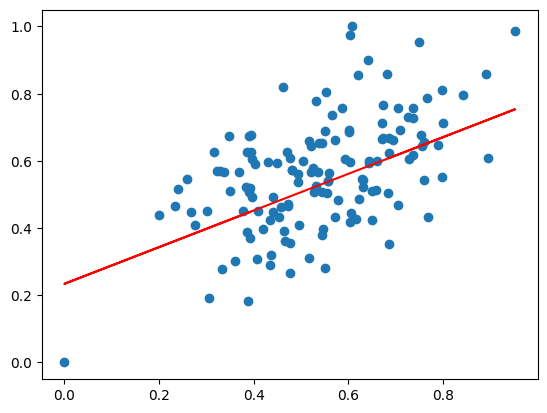

In [11]:
plt.scatter(X_train, y_train)
y_pred = m*X_train+n
plt.plot(X_train, y_pred, color="red")

In [12]:
y_test_pred = m*X_test +n
err = mean_squared_error(y_test, y_test_pred)
print(f"Testing Mean Squared Error: {err}")

Testing Mean Squared Error: 0.01576159799891117


### **Q1. Now create a linear regression model using gradient descent technique to predict height in terms of weight.**

In [13]:
df2 = pd.read_csv('Training_set_heights200.csv')
df2.head()

,Height,Weight
0,127.8296,67.63371
1,123.4114,65.95421
2,134.4043,66.14316
3,155.9981,73.45251
4,136.1354,69.30943


In [14]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

##  height in terms of weight

In [15]:
X = df_scaled[:,1]
y = df_scaled[:,0]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
LR3 = LinearRegression()
LR3.fit(X_train.reshape(-1, 1), y_train)

print(f"Intercept: {LR3.intercept_}")
print(f"Coefficient: {LR3.coef_}")

Intercept: 0.24649525701785846
Coefficient: [0.51939401]


## Iteration till 4 decimal points unchanged

In [18]:
def gradient_decent(xt, yt, m_b, n_b, L):
    D_m = 0
    D_n = 0
    for i in range(len(xt)):
        D_m += (2 / len(xt)) * ((m_b * xt[i] + n_b - yt[i]) * xt[i])
        D_n += (2 / len(xt)) * (m_b * xt[i] + n_b - yt[i])
    m_b_new = m_b - L * D_m
    n_b_new = n_b - L * D_n
    return m_b_new, n_b_new

def run_gradient_descent(xt, yt, m_b, n_b, L, max_iterations=1000):
    for iteration in range(max_iterations):
        m_b_new, n_b_new = gradient_decent(xt, yt, m_b, n_b, L)
        if np.all(np.round(m_b_new, 4) == np.round(m_b, 4)) and np.all(np.round(n_b_new, 4) == np.round(n_b, 4)):
            print(f"Converged after {iteration + 1} iterations.")
            break
        m_b, n_b = m_b_new, n_b_new
    else:
        print("Maximum iterations reached without full convergence.")
    return m_b, n_b

m_b = 0.0
n_b = 0.0
learning_rate = 0.2

m_b, n_b = run_gradient_descent(X_train, y_train, m_b, n_b, learning_rate)
print(f"Final parameters: m_b = {m_b}, n_b = {n_b}")

Converged after 393 iterations.
Final parameters: m_b = 0.5085540073514879, n_b = 0.2527363774675484


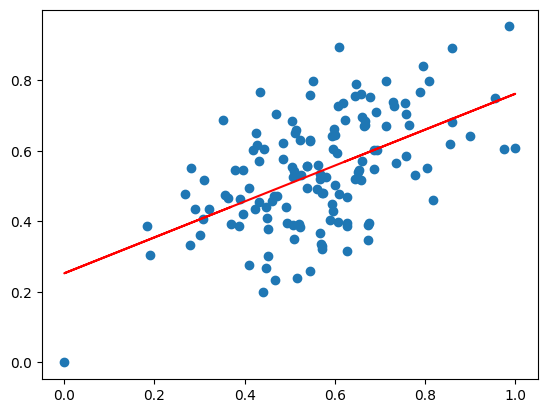

In [19]:
plt.scatter(X_train, y_train)
y_pred = m_b*X_train+n_b
plt.plot(X_train, y_pred, color="red")

In [20]:
y_test_pred = m*X_test +n
err = mean_squared_error(y_test, y_test_pred)
print(f"Testing Mean Squared Error: {err}")

Testing Mean Squared Error: 0.018597048067984106


# **Multiple Linear Regression**
### **Application on Book1.csv file**

In [21]:
book = pd.read_csv('Book1.csv')
book.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus
0,13300000,7420,4,2,3,2,furnished
1,12250000,8960,4,4,4,3,furnished
2,12250000,9960,3,2,2,2,semi-furnished
3,12215000,7500,4,2,2,3,furnished
4,11410000,7420,4,1,2,2,furnished


In [22]:
book.shape

(249, 7)

In [23]:
book.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
parking             0
furnishingstatus    0
dtype: int64

In [24]:
book['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(book.drop(['furnishingstatus'], axis=1), book['furnishingstatus'], test_size=0.2, random_state=42)

## 1-hot encoding 

In [26]:
from sklearn.preprocessing import OneHotEncoder


In [27]:
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(book[['furnishingstatus']])

In [28]:
one_hot_book = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out())

In [29]:
book_encoded = pd.concat([book, one_hot_book], axis=1)
book_encoded.drop(['furnishingstatus'], axis=1, inplace=True)
book_encoded

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1.0,0.0,0.0
1,12250000,8960,4,4,4,3,1.0,0.0,0.0
2,12250000,9960,3,2,2,2,0.0,1.0,0.0
3,12215000,7500,4,2,2,3,1.0,0.0,0.0
4,11410000,7420,4,1,2,2,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
244,4550000,5320,3,1,2,0,0.0,1.0,0.0
245,4550000,5360,3,1,2,2,0.0,0.0,1.0
246,4550000,3520,3,1,1,0,0.0,1.0,0.0
247,4550000,8400,4,1,4,3,0.0,0.0,1.0


In [30]:
X = book_encoded.drop(['price'], axis=1)
y = book_encoded['price']
y = np.array(y).reshape(-1, 1)


## **Preprocessing**

In [31]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
X_scaled = SS.fit_transform(X)
y_scaled = SS.fit_transform(y)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [33]:
y_train = np.array(y_train.reshape(199))

y_train.shape


(199,)

In [34]:
m_b = 0.0
n_b = 0.0
learning_rate = 0.2

m_b, n_b = run_gradient_descent(X_train, y_train, m_b, n_b, learning_rate)
print(f"Final parameters: m_b = {m_b}, n_b = {n_b}")

Converged after 19 iterations.
Final parameters: m_b = [ 0.28879476  0.30878645  0.46680269  0.25548182  0.30603175  0.27005068
 -0.20558665 -0.05654349], n_b = [-0.01839882 -0.01134067 -0.01044147 -0.03059856 -0.00618137 -0.01388126
 -0.01126489 -0.02028817]


In [35]:
y_p = 0
for m in m_b:
    y_p = y_p + m*X_test

y_p = y_p + n_b[-1]

In [36]:
y_p.shape

(50, 8)